In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2 
import seaborn as sns
from   datetime  import  datetime, timedelta
sns.set()

In [30]:
from pylab import rcParams
rcParams['figure.figsize'] = 14,10

In [31]:
df_train = pd.read_csv('train_(1).csv',parse_dates=['Month'],index_col='Month')
df_train.head(5)

,Avg_sunspot_count
Month,
1749-01-01,97
1749-02-01,104
1749-03-01,117
1749-04-01,93
1749-05-01,142


In [32]:
df_test = pd.read_csv('test_(1).csv',parse_dates=['Month'],index_col='Month')
df_test.head(5)

""
Month
2011-01-01
2011-02-01
2011-03-01
2011-04-01
2011-05-01


In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3144 entries, 1749-01-01 to 2010-12-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Avg_sunspot_count  3144 non-null   int64
dtypes: int64(1)
memory usage: 49.1 KB


In [34]:
df_train.isnull().sum()

Avg_sunspot_count    0
dtype: int64

<Axes: xlabel='Month'>

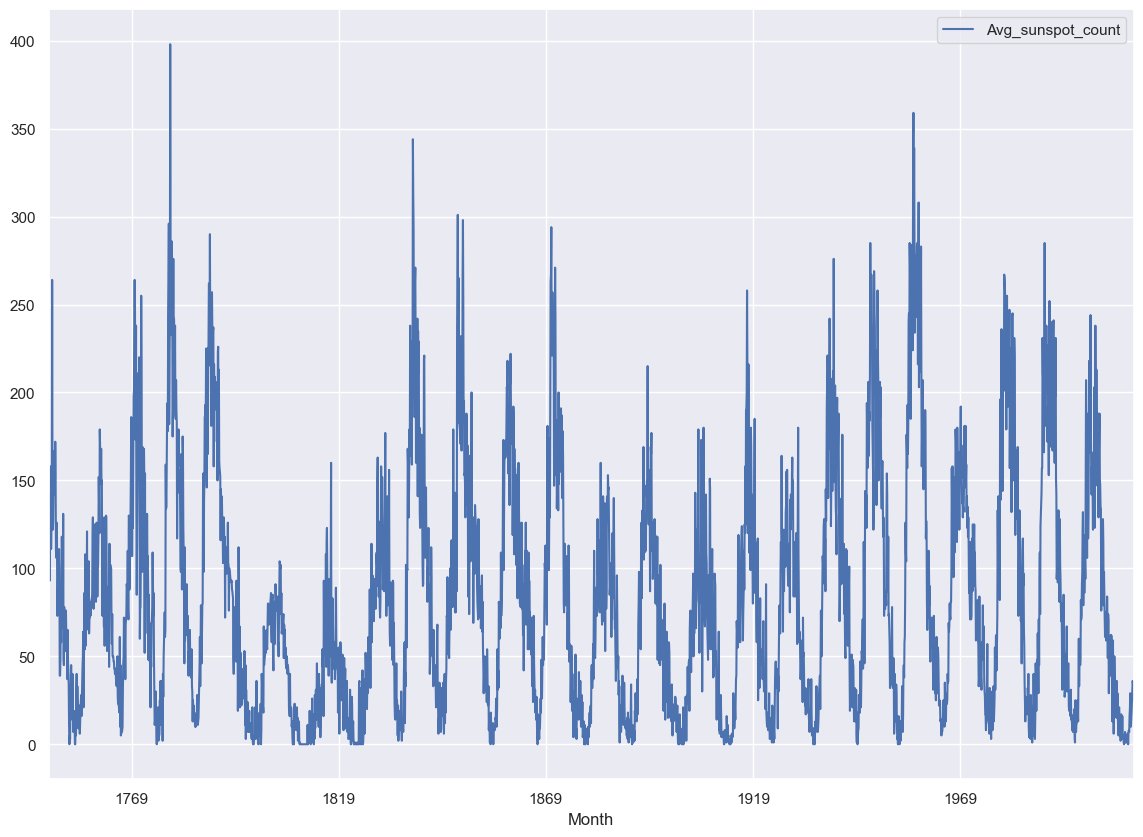

In [35]:
df_train.plot()

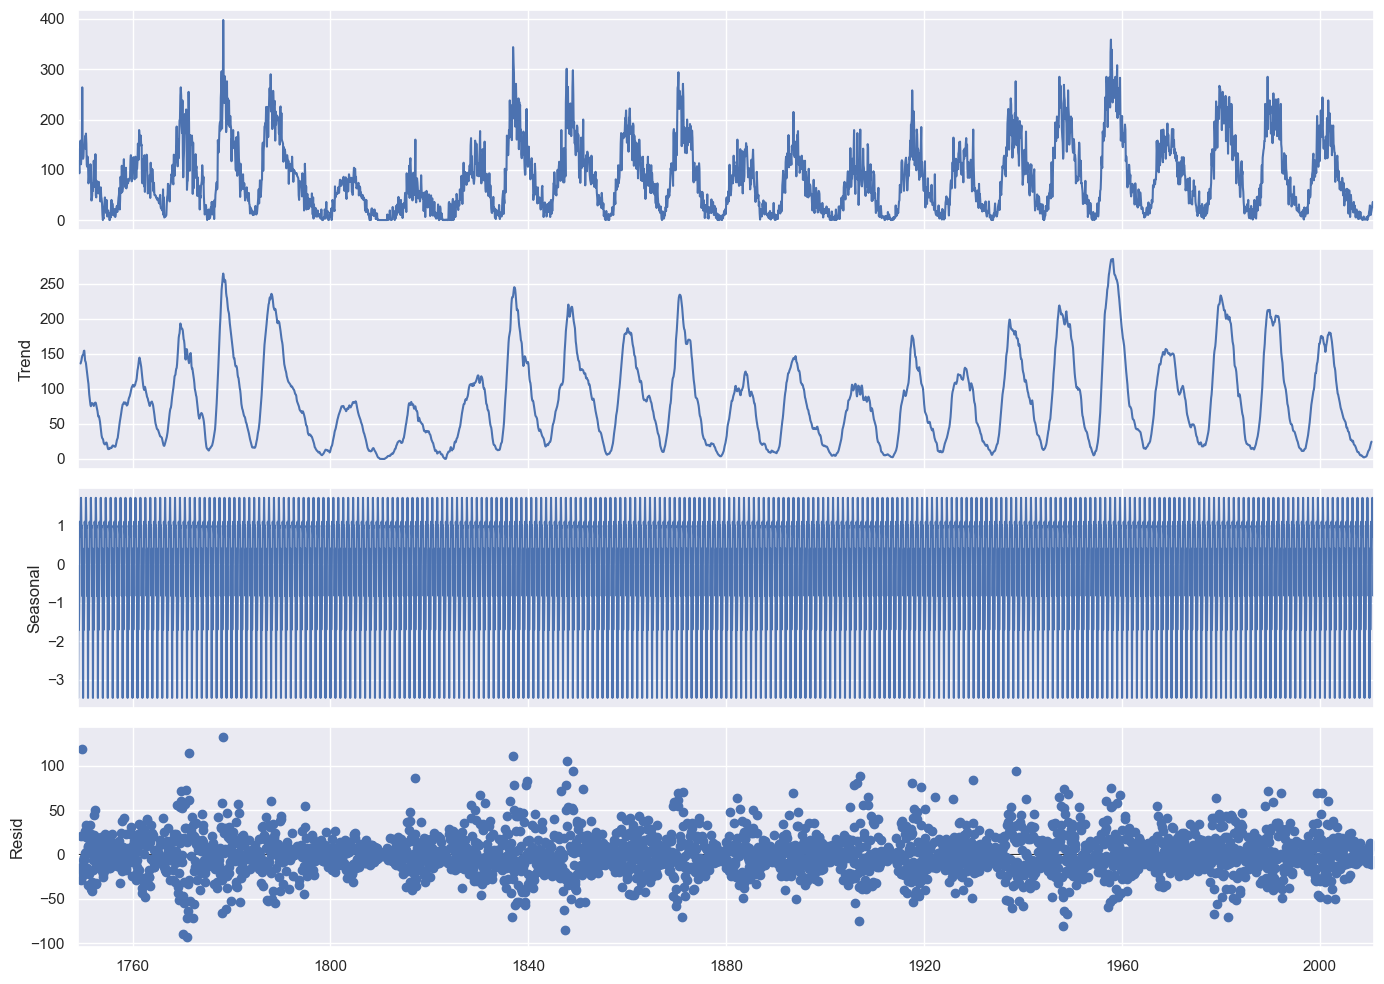

In [36]:
from statsmodels.tsa.seasonal             import  seasonal_decompose
decomposition = seasonal_decompose(df_train,model='additive')
decomposition.plot();

In [37]:
train_end = datetime(2010, 12, 31)  # Last day of training data
test_start = datetime(2011, 1, 1)   # First day of testing data
test_end = datetime(2021, 1, 1) 
train = df_train[:train_end]
test = df_test[test_start:test_end]

In [38]:
import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('parameter combinations for the Model')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

parameter combinations for the Model
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [39]:
model = ARIMA(train, order=(2,1,3))

results_Arima = model.fit()

print(results_Arima.summary())

C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      Avg_sunspot_count   No. Observations:                 3144
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -14632.509
Date:                Mon, 16 Sep 2024   AIC                          29277.017
Time:                        18:50:33   BIC                          29313.335
Sample:                    01-01-1749   HQIC                         29290.050
                         - 12-01-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7790      0.197     -3.955      0.000      -1.165      -0.393
ar.L2         -0.2100      0.111     -1.894      0.058      -0.427       0.007
ma.L1          0.3634      0.195      1.864      0.0

In [40]:
n_months = (test_end.year - test_start.year) * 12 + test_end.month - test_start.month
forecast = sarima_fit.get_forecast(steps=n_months)
forecast_mean = forecast.predicted_mean

In [41]:
forecast_index = pd.date_range(start=df_test.index[0], end=df_test.index[-1], freq='MS')
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)

In [42]:
forecast_df = pd.DataFrame({
    'Month': forecast_series.index,
    'Avg_sunspot_count': forecast_series.values
})

In [43]:
forecast_df['Avg_sunspot_count'] =  forecast_df['Avg_sunspot_count'].astype(int)

In [44]:
forecast_df['Month'] = forecast_df['Month'].dt.strftime('%m-%d-%Y')

In [45]:
forecast_df.to_csv('sunspot_data_submission.csv', index=False)